Yüksek NO2 seviyesi tespit edildi 2024-05-21 18:21:31.451370 tarihinde Sensor_1 sensörü tarafından: 129.8066838067495 µg/m³
Yüksek CO seviyesi tespit edildi 2024-05-21 18:21:31.451370 tarihinde Sensor_1 sensörü tarafından: 9.968608163890893 mg/m³
Yüksek PM2.5 seviyesi tespit edildi 2024-05-21 18:21:31.451370 tarihinde Sensor_1 sensörü tarafından: 52.026391165719865 µg/m³
Yüksek O3 seviyesi tespit edildi 2024-05-21 18:21:31.451370 tarihinde Sensor_1 sensörü tarafından: 150.05690875012496 µg/m³
Yüksek NO2 seviyesi tespit edildi 2024-05-21 18:31:31.451370 tarihinde Sensor_1 sensörü tarafından: 192.18829212017368 µg/m³
Yüksek CO seviyesi tespit edildi 2024-05-21 18:31:31.451370 tarihinde Sensor_1 sensörü tarafından: 8.383195470845916 mg/m³
Yüksek PM10 seviyesi tespit edildi 2024-05-21 18:31:31.451370 tarihinde Sensor_1 sensörü tarafından: 70.10152019649028 µg/m³
Yüksek O3 seviyesi tespit edildi 2024-05-21 18:31:31.451370 tarihinde Sensor_1 sensörü tarafından: 128.55649008522582 µg/m³
Yükse

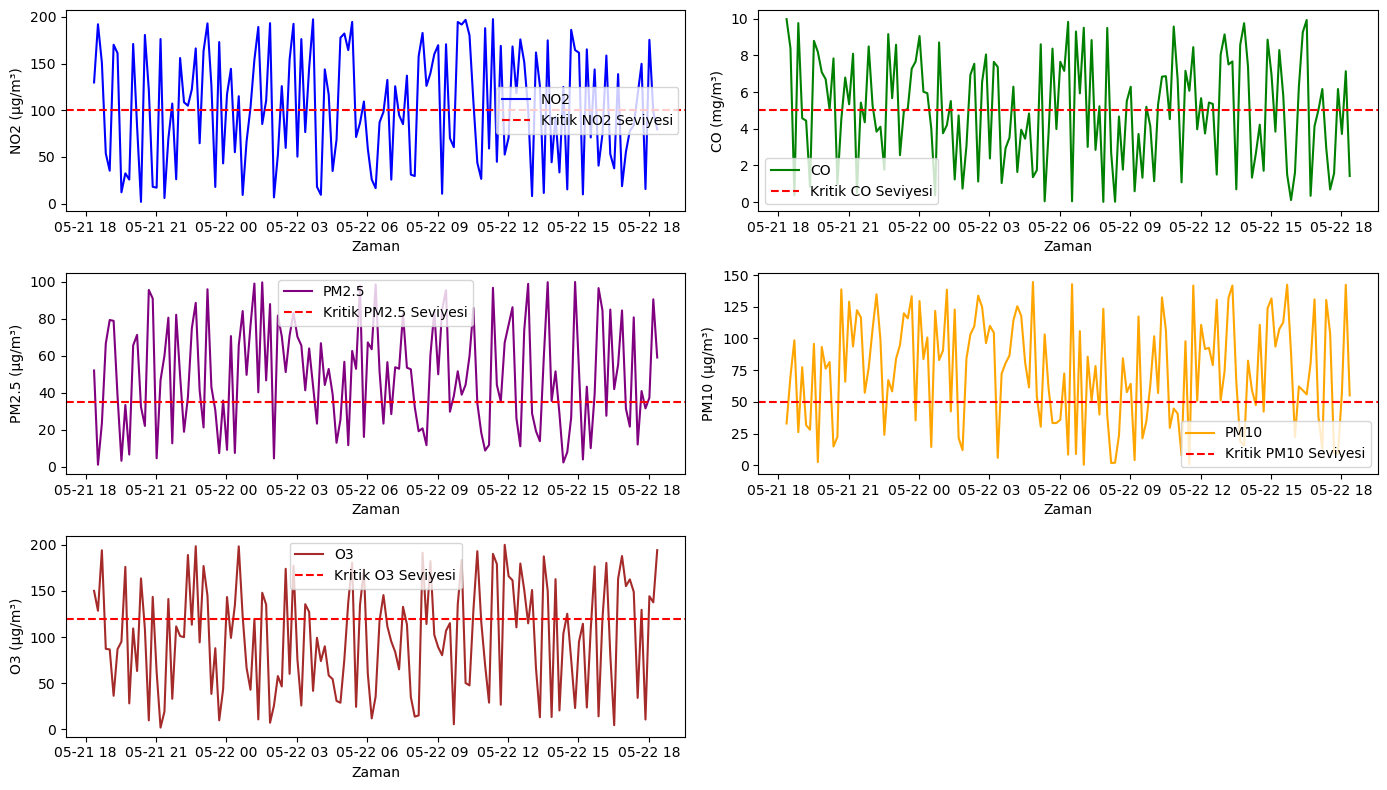

Toplu taşımanın artırılması ve yüksek NO2 bölgelerinde araç kullanımının sınırlandırılması.
Sanayi bölgelerinde daha sıkı emisyon kontrolü uygulanması.
Hava temizleyicilerin kullanımı teşvik edilmeli ve etkilenen bölgelerde yeşil alanlar artırılmalı.
Yüksek O3 günlerinde hassas gruplar için sağlık uyarıları yayınlanmalı.


In [3]:
import random
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Tasarım desenlerini entegre etme

# Observer Tasarım Deseni
class SensorVerisi:
    def __init__(self):
        self._gozlemciler = []

    def gozlemci_ekle(self, gozlemci):
        self._gozlemciler.append(gozlemci)

    def gozlemcilere_bildir(self, veri):
        for gozlemci in self._gozlemciler:
            gozlemci.guncelle(veri)

    def veri_olustur(self, sensor_id, baslangic_zamani, bitis_zamani, interval_dakika=10):
        su_an = baslangic_zamani
        veriler = []
        
        while su_an < bitis_zamani:
            no2 = random.uniform(0, 200)  # NO2 konsantrasyonu (µg/m³)
            co = random.uniform(0, 10)  # CO konsantrasyonu (mg/m³)
            pm25 = random.uniform(0, 100)  # PM2.5 konsantrasyonu (µg/m³)
            pm10 = random.uniform(0, 150)  # PM10 konsantrasyonu (µg/m³)
            o3 = random.uniform(0, 200)  # O3 konsantrasyonu (µg/m³)

            sensor_verisi = {
                'sensor_id': sensor_id,
                'zaman_damgasi': su_an,
                'NO2': no2,
                'CO': co,
                'PM2.5': pm25,
                'PM10': pm10,
                'O3': o3
            }
            
            veriler.append(sensor_verisi)
            self.gozlemcilere_bildir(sensor_verisi)
            su_an += timedelta(minutes=interval_dakika)
        
        return pd.DataFrame(veriler)

# Singleton Tasarım Deseni
class MerkeziKontrolBirimi:
    _instance = None

    def __new__(cls):
        if cls._instance is None:
            cls._instance = super(MerkeziKontrolBirimi, cls).__new__(cls)
            cls._instance.sensor_verisi = SensorVerisi()
        return cls._instance

    def sensor_ekle(self, gozlemci):
        self.sensor_verisi.gozlemci_ekle(gozlemci)

    def sensor_verisi_olustur(self, sensor_id, baslangic_zamani, bitis_zamani, interval_dakika=10):
        return self.sensor_verisi.veri_olustur(sensor_id, baslangic_zamani, bitis_zamani, interval_dakika)

# Strateji Tasarım Deseni
class AnalizStratejisi:
    def analiz_et(self, veri):
        raise NotImplementedError("Analiz etme yöntemi uygulanmamış!")

class TemelAnaliz(AnalizStratejisi):
    def analiz_et(self, veri):
        uyarilar = []
        for index, satir in veri.iterrows():
            if satir['NO2'] > KRITIK_NO2:
                uyarilar.append(f"Yüksek NO2 seviyesi tespit edildi {satir['zaman_damgasi']} tarihinde {satir['sensor_id']} sensörü tarafından: {satir['NO2']} µg/m³")
            if satir['CO'] > KRITIK_CO:
                uyarilar.append(f"Yüksek CO seviyesi tespit edildi {satir['zaman_damgasi']} tarihinde {satir['sensor_id']} sensörü tarafından: {satir['CO']} mg/m³")
            if satir['PM2.5'] > KRITIK_PM25:
                uyarilar.append(f"Yüksek PM2.5 seviyesi tespit edildi {satir['zaman_damgasi']} tarihinde {satir['sensor_id']} sensörü tarafından: {satir['PM2.5']} µg/m³")
            if satir['PM10'] > KRITIK_PM10:
                uyarilar.append(f"Yüksek PM10 seviyesi tespit edildi {satir['zaman_damgasi']} tarihinde {satir['sensor_id']} sensörü tarafından: {satir['PM10']} µg/m³")
            if satir['O3'] > KRITIK_O3:
                uyarilar.append(f"Yüksek O3 seviyesi tespit edildi {satir['zaman_damgasi']} tarihinde {satir['sensor_id']} sensörü tarafından: {satir['O3']} µg/m³")
        
        return uyarilar

# Facade Tasarım Deseni
class HavaKalitesiFacade:
    def __init__(self):
        self.merkezi_kontrol_birimi = MerkeziKontrolBirimi()
        self.analiz_stratejisi = TemelAnaliz()
    
    def sensor_ekle(self, sensor):
        self.merkezi_kontrol_birimi.sensor_ekle(sensor)

    def veri_topla(self, sensor_id, baslangic_zamani, bitis_zamani):
        return self.merkezi_kontrol_birimi.sensor_verisi_olustur(sensor_id, baslangic_zamani, bitis_zamani)

    def veriyi_analiz_et(self, veri):
        return self.analiz_stratejisi.analiz_et(veri)

    def veriyi_gorsellestir(self, veri):
        sensor_verisini_gorsellestir(veri)

    def onerileri_al(self, uyarilar):
        return proaktif_yonetim_onerileri(uyarilar)

# Uyarı sistemi için sabitler
KRITIK_NO2 = 100
KRITIK_CO = 5
KRITIK_PM25 = 35
KRITIK_PM10 = 50
KRITIK_O3 = 120

# Veri analizi ve uyarı oluşturma
def analiz_et_ve_uyar(veri):
    uyarilar = []
    for index, satir in veri.iterrows():
        if satir['NO2'] > KRITIK_NO2:
            uyarilar.append(f"Yüksek NO2 seviyesi tespit edildi {satir['zaman_damgasi']} tarihinde {satir['sensor_id']} sensörü tarafından: {satir['NO2']} µg/m³")
        if satir['CO'] > KRITIK_CO:
            uyarilar.append(f"Yüksek CO seviyesi tespit edildi {satir['zaman_damgasi']} tarihinde {satir['sensor_id']} sensörü tarafından: {satir['CO']} mg/m³")
        if satir['PM2.5'] > KRITIK_PM25:
            uyarilar.append(f"Yüksek PM2.5 seviyesi tespit edildi {satir['zaman_damgasi']} tarihinde {satir['sensor_id']} sensörü tarafından: {satir['PM2.5']} µg/m³")
        if satir['PM10'] > KRITIK_PM10:
            uyarilar.append(f"Yüksek PM10 seviyesi tespit edildi {satir['zaman_damgasi']} tarihinde {satir['sensor_id']} sensörü tarafından: {satir['PM10']} µg/m³")
        if satir['O3'] > KRITIK_O3:
            uyarilar.append(f"Yüksek O3 seviyesi tespit edildi {satir['zaman_damgasi']} tarihinde {satir['sensor_id']} sensörü tarafından: {satir['O3']} µg/m³")
    
    return uyarilar

# Veriyi görselleştirme
def sensor_verisini_gorsellestir(veri):
    plt.figure(figsize=(14, 8))
    
    plt.subplot(3, 2, 1)
    plt.plot(veri['zaman_damgasi'], veri['NO2'], label='NO2', color='blue')
    plt.axhline(y=KRITIK_NO2, color='red', linestyle='--', label='Kritik NO2 Seviyesi')
    plt.xlabel('Zaman')
    plt.ylabel('NO2 (µg/m³)')
    plt.legend()
    
    plt.subplot(3, 2, 2)
    plt.plot(veri['zaman_damgasi'], veri['CO'], label='CO', color='green')
    plt.axhline(y=KRITIK_CO, color='red', linestyle='--', label='Kritik CO Seviyesi')
    plt.xlabel('Zaman')
    plt.ylabel('CO (mg/m³)')
    plt.legend()
    
    plt.subplot(3, 2, 3)
    plt.plot(veri['zaman_damgasi'], veri['PM2.5'], label='PM2.5', color='purple')
    plt.axhline(y=KRITIK_PM25, color='red', linestyle='--', label='Kritik PM2.5 Seviyesi')
    plt.xlabel('Zaman')
    plt.ylabel('PM2.5 (µg/m³)')
    plt.legend()
    
    plt.subplot(3, 2, 4)
    plt.plot(veri['zaman_damgasi'], veri['PM10'], label='PM10', color='orange')
    plt.axhline(y=KRITIK_PM10, color='red', linestyle='--', label='Kritik PM10 Seviyesi')
    plt.xlabel('Zaman')
    plt.ylabel('PM10 (µg/m³)')
    plt.legend()
    
    plt.subplot(3, 2, 5)
    plt.plot(veri['zaman_damgasi'], veri['O3'], label='O3', color='brown')
    plt.axhline(y=KRITIK_O3, color='red', linestyle='--', label='Kritik O3 Seviyesi')
    plt.xlabel('Zaman')
    plt.ylabel('O3 (µg/m³)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Proaktif yönetim için öneriler
def proaktif_yonetim_onerileri(uyarilar):
    oneriler = []
    if any('NO2' in uyarı for uyarı in uyarilar):
        oneriler.append("Toplu taşımanın artırılması ve yüksek NO2 bölgelerinde araç kullanımının sınırlandırılması.")
    if any('CO' in uyarı for uyarı in uyarilar):
        oneriler.append("Sanayi bölgelerinde daha sıkı emisyon kontrolü uygulanması.")
    if any('PM2.5' in uyarı for uyarı in uyarilar) or any('PM10' in uyarı for uyarı in uyarilar):
        oneriler.append("Hava temizleyicilerin kullanımı teşvik edilmeli ve etkilenen bölgelerde yeşil alanlar artırılmalı.")
    if any('O3' in uyarı for uyarı in uyarilar):
        oneriler.append("Yüksek O3 günlerinde hassas gruplar için sağlık uyarıları yayınlanmalı.")
    
    return oneriler

# Observer Tasarım Deseni: Uyarı sistemi
class UyariSistemi:
    def guncelle(self, veri):
        uyarilar = analiz_et_ve_uyar(pd.DataFrame([veri]))
        for uyarı in uyarilar:
            print(uyarı)

# Simülasyon başlangıcı
baslangic_zamani = datetime.now() - timedelta(days=1)
bitis_zamani = datetime.now()

# Merkezi kontrol birimi (Singleton)
merkezi_kontrol_birimi = MerkeziKontrolBirimi()

# Uyarı sistemini kaydetme (Observer Tasarım Deseni)
uyari_sistemi = UyariSistemi()
merkezi_kontrol_birimi.sensor_ekle(uyari_sistemi)

# Verileri toplama ve analiz etme
facade = HavaKalitesiFacade()
sensor_verisi = facade.veri_topla(sensor_id='Sensor_1', baslangic_zamani=baslangic_zamani, bitis_zamani=bitis_zamani)

# Verileri analiz etme ve uyarıları alma
uyarilar = facade.veriyi_analiz_et(sensor_verisi)

# Veriyi görselleştirme
facade.veriyi_gorsellestir(sensor_verisi)

# Önerileri alma
oneriler = facade.onerileri_al(uyarilar)
for oneri in oneriler:
    print(oneri)